# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Chargement des données

In [2]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [3]:
train_data.head(), test_data.head()

(   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
 0      1       0       0       0       0       0       0       0       0   
 1      0       0       0       0       0       0       0       0       0   
 2      1       0       0       0       0       0       0       0       0   
 3      4       0       0       0       0       0       0       0       0   
 4      0       0       0       0       0       0       0       0       0   
 
    pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel780  pixel781  pixel782  pixel783  
 0         0   

# Séparer features et target pour les données de train

In [4]:
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

# Normalisation des données

In [5]:
X_train = X_train / 255.0 #Valeurs d'un pixel entre 0 et 1

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1) # Reshaper les données pour qu'elles conviennent au CNN (images de 28x28 pixels)

# Séparation des données train et val

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Préparation des données de test

In [8]:
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)

In [9]:
X_train.shape, X_val.shape, X_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (28000, 28, 28, 1))

# Modèle CNN

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/Users/guillaumedemerges/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compilation

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrainement

In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8294 - loss: 0.5284 - val_accuracy: 0.9767 - val_loss: 0.0767
Epoch 2/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9686 - loss: 0.1026 - val_accuracy: 0.9825 - val_loss: 0.0601
Epoch 3/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9766 - loss: 0.0729 - val_accuracy: 0.9841 - val_loss: 0.0512
Epoch 4/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9825 - loss: 0.0567 - val_accuracy: 0.9889 - val_loss: 0.0389
Epoch 5/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9862 - loss: 0.0441 - val_accuracy: 0.9870 - val_loss: 0.0437
Epoch 6/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9868 - loss: 0.0403 - val_accuracy: 0.9876 - val_loss: 0.0417
Epoch 7/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9887 - loss: 0.0365 - val_accuracy: 0.9889 - val_loss: 0.0374
Epoch 8/20
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9904 - loss: 0.0296 - 

In [14]:
model.save('mnist_cnn_model.h5')

In [15]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

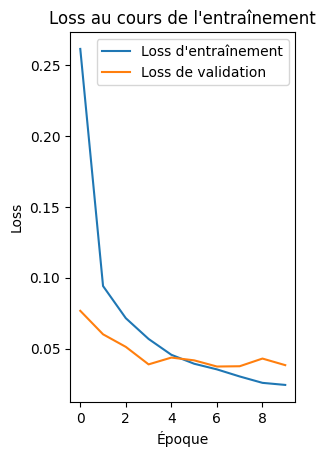

In [16]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss d\'entraînement')
plt.plot(history.history['val_loss'], label='Loss de validation')
plt.title('Loss au cours de l\'entraînement')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()

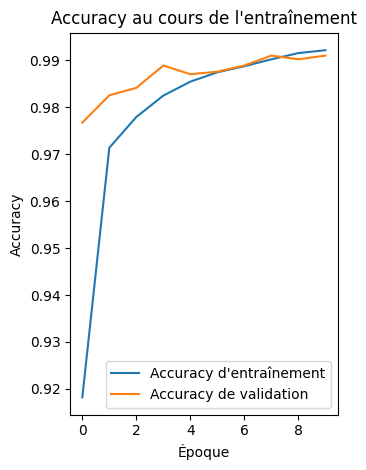

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy de validation')
plt.title('Accuracy au cours de l\'entraînement')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()